In [69]:
import pandas as pd
raw_data = pd.read_csv('datasets/carPrice.csv') 
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [70]:
# Model has 312 unique values, which is too many for a categorical variable, so we need to drop it
raw_data = raw_data.drop(['Model'], axis=1)

In [71]:
# check for missing values
raw_data.isnull().sum()
# if the sum is less than 5% of the total data, we can drop the rows with missing values
raw_data = raw_data.dropna(axis=0)

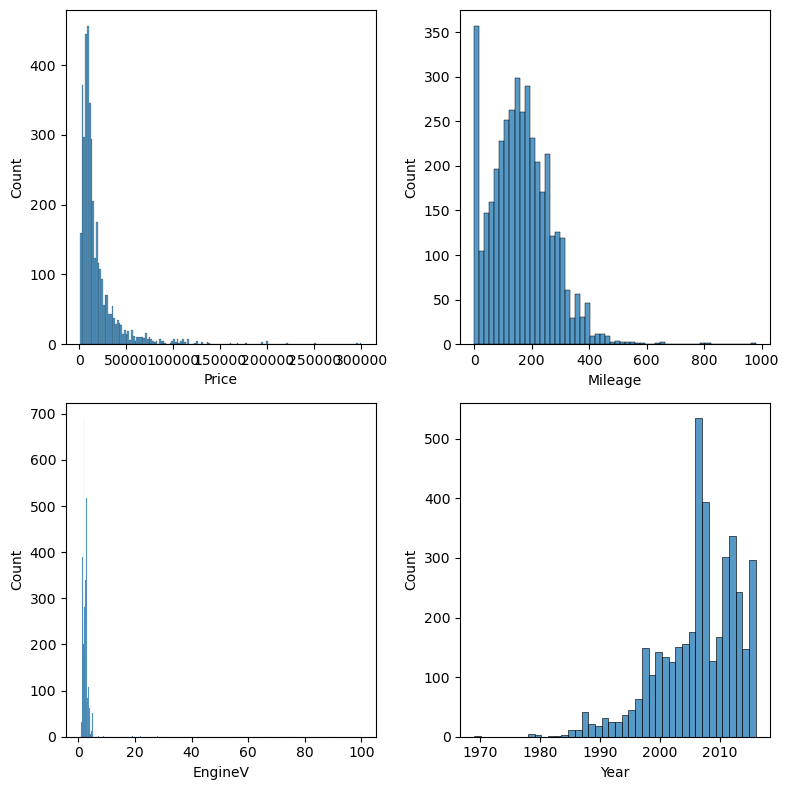

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2, figsize=(8,8))
sns.histplot(raw_data['Price'], ax=axes[0,0])
sns.histplot(raw_data['Mileage'], ax=axes[0,1])
sns.histplot(raw_data['EngineV'], ax=axes[1,0])
sns.histplot(raw_data['Year'], ax=axes[1,1])
plt.tight_layout()
plt.show()
# sns.displot(raw_data['year'], ax=axes[2,0])

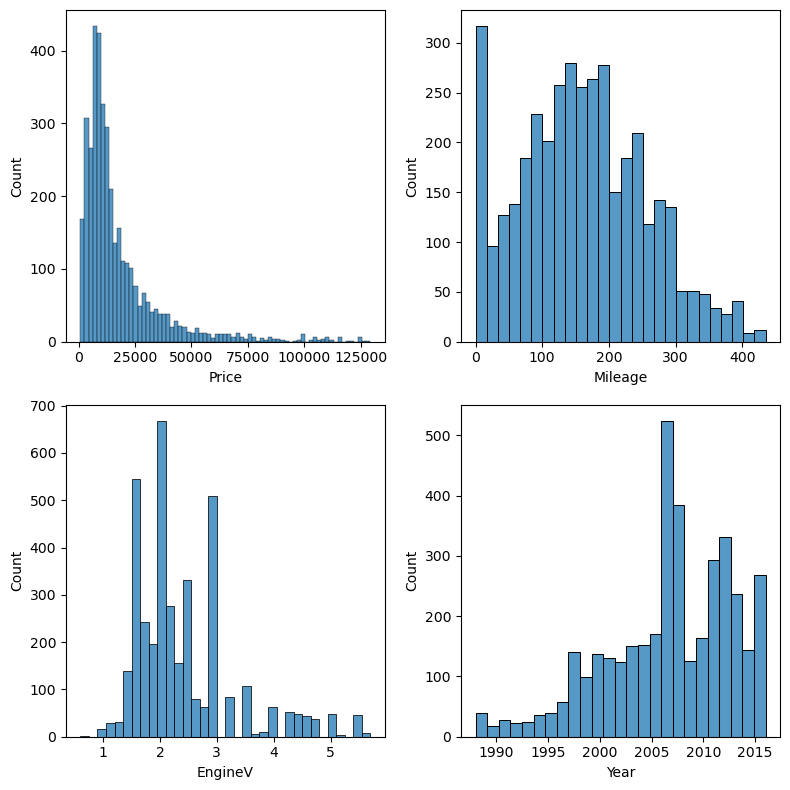

In [73]:
# remove outliers
q =  raw_data['Price'].quantile(0.99); raw_data = raw_data[raw_data['Price']<q]
q =  raw_data['Mileage'].quantile(0.99); raw_data = raw_data[raw_data['Mileage']<q]
q =  raw_data['EngineV'].quantile(0.99); raw_data = raw_data[raw_data['EngineV']<q]
q =  raw_data['Year'].quantile(0.01); raw_data = raw_data[raw_data['Year']>q]
fig, axes = plt.subplots(2,2, figsize=(8,8))
sns.histplot(raw_data['Price'], ax=axes[0,0])
sns.histplot(raw_data['Mileage'], ax=axes[0,1])
sns.histplot(raw_data['EngineV'], ax=axes[1,0])
sns.histplot(raw_data['Year'], ax=axes[1,1])
plt.tight_layout()
plt.show()

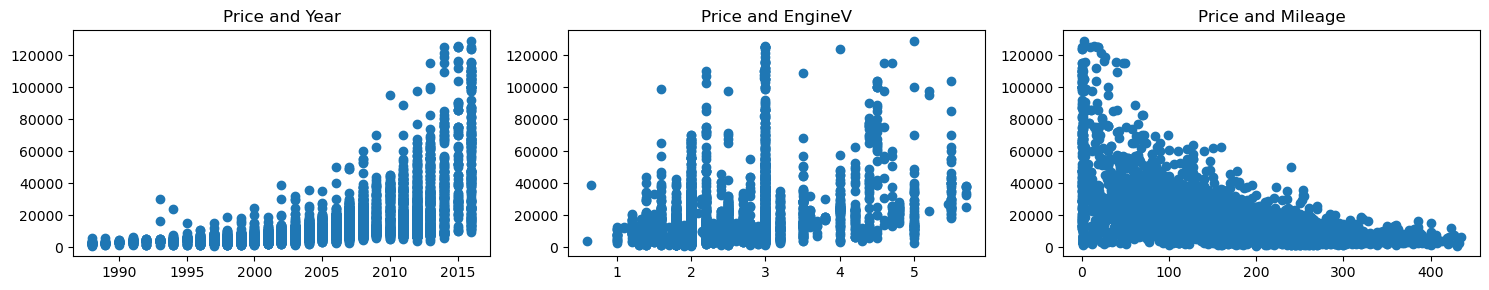

In [74]:
data = raw_data.reset_index(drop=True)
# check for linearity
fig, axes = plt.subplots(1,3, figsize=(15,3))
axes[0].scatter(data['Year'], data['Price'])
axes[0].set_title('Price and Year')
axes[1].scatter(data['EngineV'], data['Price'])
axes[1].set_title('Price and EngineV')
axes[2].scatter(data['Mileage'], data['Price'])
axes[2].set_title('Price and Mileage')
plt.tight_layout()
plt.show()

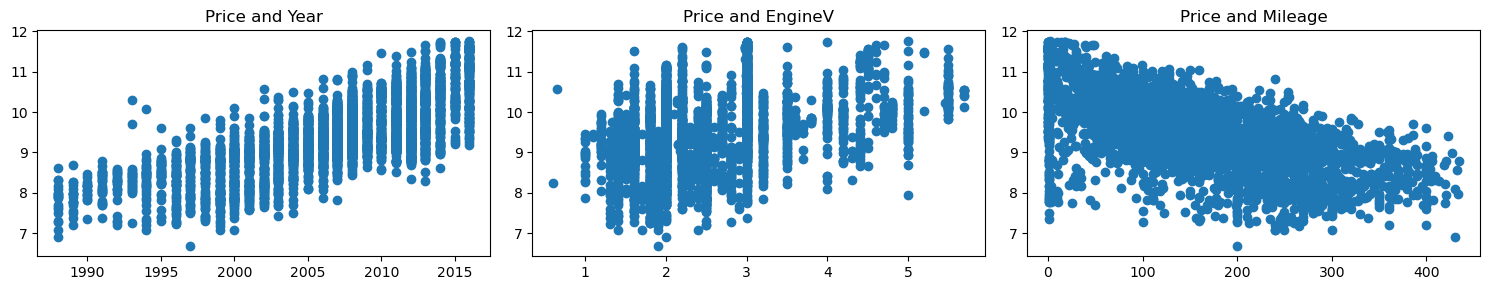

In [75]:
import numpy as np
data['Price_log'] = np.log(data['Price'])
fig, axes = plt.subplots(1,3, figsize=(15,3))
axes[0].scatter(data['Year'], data['Price_log'])
axes[0].set_title('Price and Year')
axes[1].scatter(data['EngineV'], data['Price_log'])
axes[1].set_title('Price and EngineV')
axes[2].scatter(data['Mileage'], data['Price_log'])
axes[2].set_title('Price and Mileage')
plt.tight_layout()
plt.show()

In [76]:
# check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variance_inflation_factor(data[['Year', 'Mileage', 'EngineV']].values, 0)
vif = pd.DataFrame()
vif["Features"] = ['Year', 'Mileage', 'EngineV']
vif["VIF"] = [variance_inflation_factor(data[['Year', 'Mileage', 'EngineV']], i) for i in range(3)]
vif

,Features,VIF
0,Year,10.823028
1,Mileage,3.798257
2,EngineV,8.262153


In [77]:
data = data.drop(['Year'], axis=1)
# create dummy variables
data_with_dummies = pd.get_dummies(data, drop_first=True)
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'Price_log', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

R2 score:  0.8614704081308995


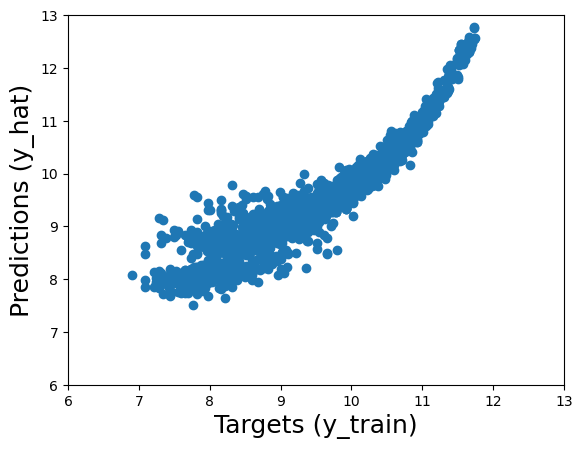

Text(0.5, 1.0, 'Residuals PDF')

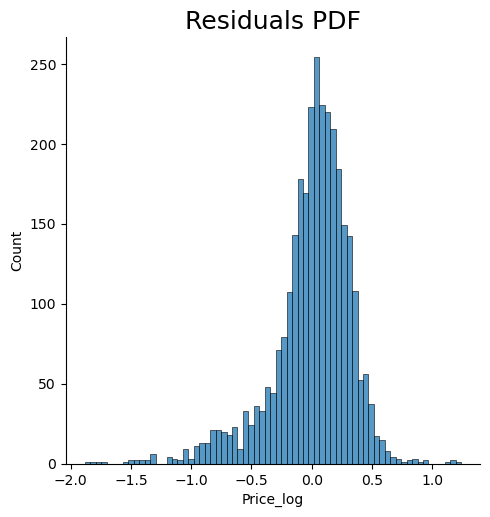

In [78]:
cols = ['Price_log', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

target = data_with_dummies['Price_log']
inputs = data_with_dummies.drop(['Price_log'], axis=1)

scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=98)
model = LinearRegression()
model.fit(x_train, y_train)
print("R2 score: ", model.score(x_train, y_train))

y_hat = model.predict(x_train)
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

sns.displot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

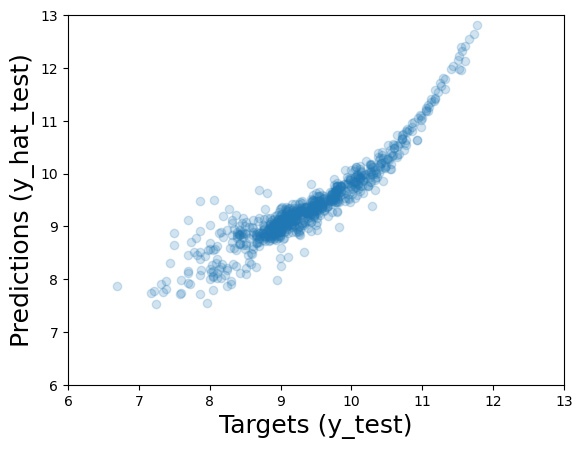

In [79]:
# Test the model
y_hat_test = model.predict(x_test)
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [80]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,768.000000,768.000000,768.000000,768.000000
mean,18692.026402,17340.211081,-1351.815321,25.617407
std,32226.642076,18301.452188,17529.590830,37.090122
min,1858.702977,800.000000,-238592.740056,0.026298
25%,7613.383602,7337.500000,-1069.363883,7.611709
50%,10641.799282,10999.000000,453.542690,16.043282
75%,16598.427713,20000.000000,2688.084032,27.069728
max,367814.740056,129222.000000,17548.773246,405.800953
